In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Shut in lifts incidents attended by LFB in last 36 months (1).csv")
df.head()

,CalYear,DateTimeOfCall,IncidentNumber,BuildingName,Street,PostCode,Full Address,ParentUPRN,PropertyType,BoroughCode,Borough,WardCode,Ward,PumpCount,PumpHoursTotal,HourlyNotionalCost(�),IncidentNotionalCost(�)
0,2018,01/10/2018 06:50,139666-01102018,NaN,ST ANNS ROAD,HA1 1NB,"MARKS & SPENCER, 31 ST ANNS ROAD, HARROW, HA1 1NB",1.000230e+11,Single shop (P),E09000015,HARROW,E05000288,GREENHILL,1.0,1.0,333,333.0
1,2018,01/10/2018 07:11,139677-01102018,NaN,HARLEY STREET,W1G 9PP,"40 HARLEY STREET, LONDON, CITY OF WESTMINSTER,...",1.000235e+11,Medical/health centre (P),E09000033,WESTMINSTER,E05000649,WEST END,1.0,1.0,333,333.0
2,2018,01/10/2018 07:34,139685-01102018,NaN,WALPOLE PLACE,SE18 6TW,"BLOCK AT, 1-30 WALPOLE PLACE, WOOLWICH, GREENW...",1.001024e+10,Flats/Maisonettes - 4 to 9 storeys (P),E09000011,GREENWICH,E05000229,WOOLWICH COMMON,1.0,1.0,333,333.0
3,2018,01/10/2018 10:42,139737-01102018,MARION COURT,TOOTING HIGH STREET,SW17 0RU,"MARION COURT, TOOTING HIGH STREET, LONDON, WAN...",1.210135e+08,Converted Flats - 3 or more storeys (P),E09000032,WANDSWORTH,E05000626,TOOTING,1.0,1.0,333,333.0
4,2018,01/10/2018 12:35,139779-01102018,DENTON,MALDEN CRESCENT,NW1 8BN,"DENTON, MALDEN CRESCENT, LONDON, CAMDEN, NW1 8BN",5.105113e+06,Flats/Maisonettes - 10 or more storeys (P),E09000007,CAMDEN,E05000136,HAVERSTOCK,1.0,1.0,333,333.0


In [3]:
# dropping all columns except DateTimeOfCall and BoroughCode
df = df[['DateTimeOfCall', 'BoroughCode']]
df.head()

,DateTimeOfCall,BoroughCode
0,01/10/2018 06:50,E09000015
1,01/10/2018 07:11,E09000033
2,01/10/2018 07:34,E09000011
3,01/10/2018 10:42,E09000032
4,01/10/2018 12:35,E09000007


In [4]:
# extracting date from DateTimeOfCall
import re

incident_date = []
date_pattern = r'(\d{2}/\d{2}/\d{4}) (\d{2}):(\d{2})'

for t in df['DateTimeOfCall']:
    if(match := re.match(date_pattern, t)):
        incident_date.append(match.group(1))
        
df['date'] = incident_date
df.head()

,DateTimeOfCall,BoroughCode,date
0,01/10/2018 06:50,E09000015,01/10/2018
1,01/10/2018 07:11,E09000033,01/10/2018
2,01/10/2018 07:34,E09000011,01/10/2018
3,01/10/2018 10:42,E09000032,01/10/2018
4,01/10/2018 12:35,E09000007,01/10/2018


In [5]:
# extracting borough short code from BoroughCode

df['bsc'] = [item[-2:] for item in df['BoroughCode']]
df.drop(['DateTimeOfCall', 'BoroughCode'], axis = 1, inplace = True)
df.head()

,date,bsc
0,01/10/2018,15
1,01/10/2018,33
2,01/10/2018,11
3,01/10/2018,32
4,01/10/2018,07


In [6]:
X1_idx = 0; X2_idx = 1; y_idx = 2

data_dict = {}

for i in df['bsc']:
    for j in df['date']:
        key = i + ',' + j
        data_dict[key] = [i, j, 0]

for idx in range(len(df['bsc'])):
    key = df.loc[idx, 'bsc'] + ',' + df.loc[idx, 'date']
    
    if key in data_dict.keys():
        data_dict[key][y_idx] += 1
    else:
        print("Error: The key " + key + " does not exist in the dictionary. Count aborted!")
        break

In [7]:
del df
df = pd.DataFrame()
df['bsc'] = np.array([data_dict[idx][X1_idx] for idx in data_dict.keys()])
df['date'] = np.array([data_dict[idx][X2_idx] for idx in data_dict.keys()])
df['count'] = np.array([data_dict[idx][y_idx] for idx in data_dict.keys()])

df['date'] = pd.to_datetime(df['date'])
df['bsc'] = pd.to_numeric(df['bsc'])
df.head()

,bsc,date,count
0,15,2018-01-10,2
1,15,2018-02-10,0
2,15,2018-03-10,1
3,15,2018-04-10,0
4,15,2018-05-10,1


In [8]:
df_b1 = pd.DataFrame()
df_b1 = df.loc[df['bsc'] == 1]
df_b1

,bsc,date,count
5480,1,2018-01-10,1
5481,1,2018-02-10,0
5482,1,2018-03-10,0
5483,1,2018-04-10,0
5484,1,2018-05-10,2
...,...,...,...
6571,1,2021-09-26,1
6572,1,2021-09-27,0
6573,1,2021-09-28,0
6574,1,2021-09-29,0


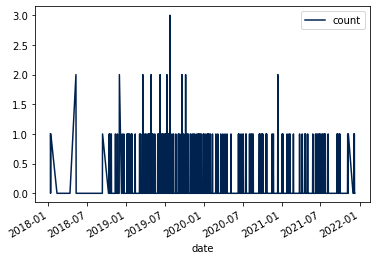

In [9]:
%matplotlib inline
df_b1.plot ( x ='date', y = 'count', kind = 'line', colormap = 'cividis')
plt.show()

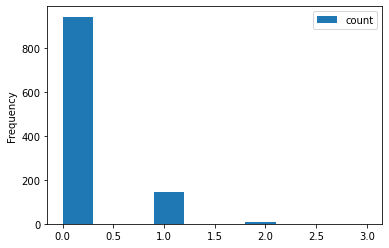

In [10]:
df_b1.plot ( x ='date', y = 'count', kind = 'hist' )
plt.show()